# **About Dataset**

📊 **Social Media vs Productivity** — Realistic Behavioral Dataset (30,000 Users)

This dataset explores how daily digital habits — including social media usage, screen time, and notification exposure — relate to individual productivity, stress, and well-being.

🔍 **What’s Inside?**

The dataset contains 30,000 real-world-style records simulating behavioral patterns of people with various jobs, social habits, and lifestyle choices. The goal is to understand how different digital behaviors correlate with perceived and actual productivity.
🧠 Why This Dataset is Valuable

✅ **Designed for real-world ML workflows**

Includes missing values, noise, and outliers — ideal for practicing data cleaning and preprocessing.

🔗 **High correlation between target features**

The perceived_productivity_score and actual_productivity_score are strongly correlated, making this dataset suitable for experiments in feature selection and multicollinearity.

🛠️ **Feature Engineering playground**

Use this dataset to practice feature scaling, encoding, binning, interaction terms, and more.

🧪 **Perfect for EDA, regression & classification**

You can model productivity, stress, or satisfaction based on behavior patterns and digital exposure.

🧾 **Columns & Feature Info**

Column Name 	Description

age 	Age of the individual (18–65 years)

gender 	Gender identity: Male, Female, or Other

job_type 	Employment sector or status (IT, Education, Student, etc.)

daily_social_media_time 	Average daily time spent on social media (hours)

social_platform_preference 	Most-used social platform (Instagram, TikTok, Telegram, etc.)

number_of_notifications 	Number of mobile/social notifications per day

work_hours_per_day 	Average hours worked each day

perceived_productivity_score 	Self-rated productivity score (scale: 0–10)

actual_productivity_score 	Simulated ground-truth productivity score (scale: 0–10)

stress_level 	Current stress level (scale: 1–10)

sleep_hours 	Average hours of sleep per night

screen_time_before_sleep 	Time spent on screens before sleeping (hours)

breaks_during_work 	Number of breaks taken during work hours

uses_focus_apps 	Whether the user uses digital focus apps (True/False)

has_digital_wellbeing_enabled 	Whether Digital Wellbeing is activated (True/False)

coffee_consumption_per_day 	Number of coffee cups consumed per day

days_feeling_burnout_per_month 	Number of burnout days reported per month

weekly_offline_hours 	Total hours spent offline each week (excluding sleep)

job_satisfaction_score 	Satisfaction with job/life responsibilities (scale: 0–10)

📌 **Notes**

Contains NaN values in critical columns (productivity, sleep, stress) for data imputation tasks

Includes outliers in media usage, coffee intake, and notification count
Target columns are strongly correlated for multicollinearity testing
Multi-purpose: regression, classification, clustering, visualization

💡 **Use Cases**

Exploratory Data Analysis (EDA)

Feature engineering pipelines

Machine learning model benchmarking

Statistical hypothesis testing

Burnout and mental health prediction projects

https://www.kaggle.com/datasets/mahdimashayekhi/social-media-vs-productivity


# **Packages and Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# **First aproach of data**

In [2]:
social_df = pd.read_csv('/content/social_media_vs_productivity.csv')

In [3]:
social_df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [4]:
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [5]:
social_df.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,2765
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
perceived_productivity_score,1614
actual_productivity_score,2365
stress_level,1904


In [6]:
social_df.duplicated().sum()

np.int64(0)

# **NAN Aproach**

In [7]:
# List of columns with missing data
missing_cols = [
    'daily_social_media_time', 'perceived_productivity_score', 'actual_productivity_score',
    'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'job_satisfaction_score'
]

# Conditional imputation
for col in missing_cols:
    skewness = social_df[col].skew()
    if abs(skewness) < 0.5:
        # Approximately symmetric distribution: use mean
        social_df[col].fillna(social_df[col].mean(), inplace=True)
        print(f"Filled missing values in {col} with MEAN.")
    else:
        # Skewed distribution: use median
        social_df[col].fillna(social_df[col].median(), inplace=True)
        print(f"Filled missing values in {col} with MEDIAN.")

Filled missing values in daily_social_media_time with MEDIAN.
Filled missing values in perceived_productivity_score with MEAN.
Filled missing values in actual_productivity_score with MEAN.
Filled missing values in stress_level with MEAN.
Filled missing values in sleep_hours with MEAN.
Filled missing values in screen_time_before_sleep with MEAN.
Filled missing values in job_satisfaction_score with MEAN.


In [8]:
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         30000 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    30000 non-null  float64
 8   actual_productivity_score       30000 non-null  float64
 9   stress_level                    30000 non-null  float64
 10  sleep_hours                     30000 non-null  float64
 11  screen_time_before_sleep        30000 non-null  float64
 12  breaks_during_work              

# **Missing Value Imputation Strategy**

To ensure consistency and reliability in our exploratory analysis and modeling steps, we imputed missing values using central tendency measures. Specifically, we applied:

- **Mean imputation for features with approximately symmetric distributions (low skewness), such as perceived_productivity_score.**

- **Median imputation for skewed variables (e.g., daily_social_media_time or stress_level), as it is more robust to outliers.**

This approach aligns with best practices in real-world data preprocessing and preserves the distributional characteristics of each feature while ensuring that our dataset is complete for further analysis.

# **Univariate Analysis (Qualitatives)**

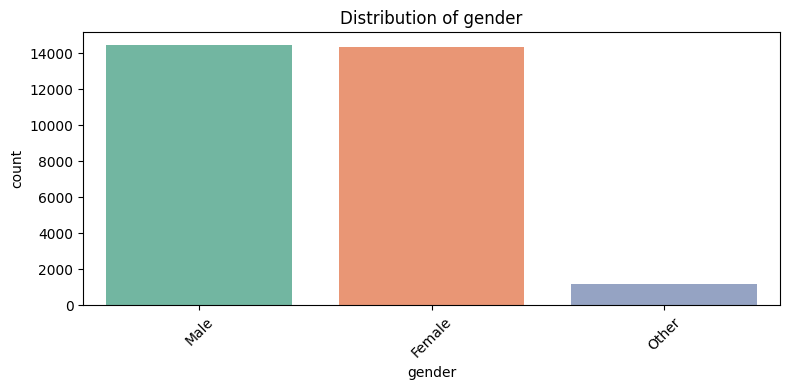

gender
Male      14452
Female    14370
Other      1178
Name: count, dtype: int64
gender
Male      0.482
Female    0.479
Other     0.039
Name: proportion, dtype: float64

----------------------------------------



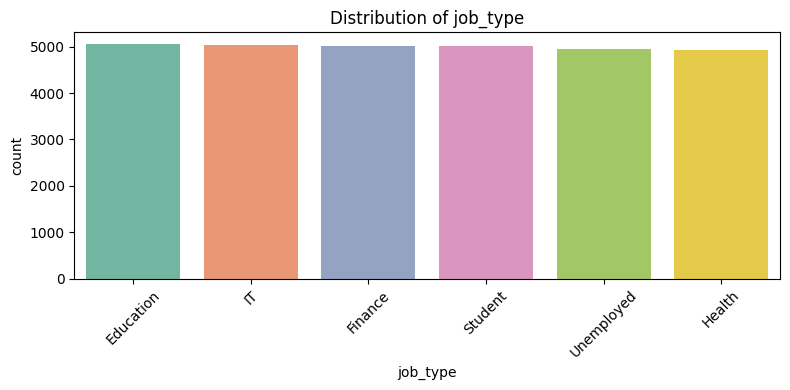

job_type
Education     5055
IT            5026
Finance       5017
Student       5012
Unemployed    4958
Health        4932
Name: count, dtype: int64
job_type
Education     0.168
IT            0.168
Finance       0.167
Student       0.167
Unemployed    0.165
Health        0.164
Name: proportion, dtype: float64

----------------------------------------



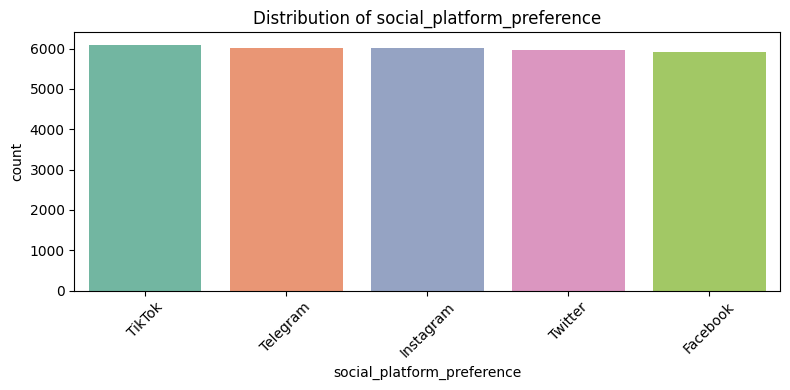

social_platform_preference
TikTok       6096
Telegram     6013
Instagram    6006
Twitter      5964
Facebook     5921
Name: count, dtype: int64
social_platform_preference
TikTok       0.203
Telegram     0.200
Instagram    0.200
Twitter      0.199
Facebook     0.197
Name: proportion, dtype: float64

----------------------------------------



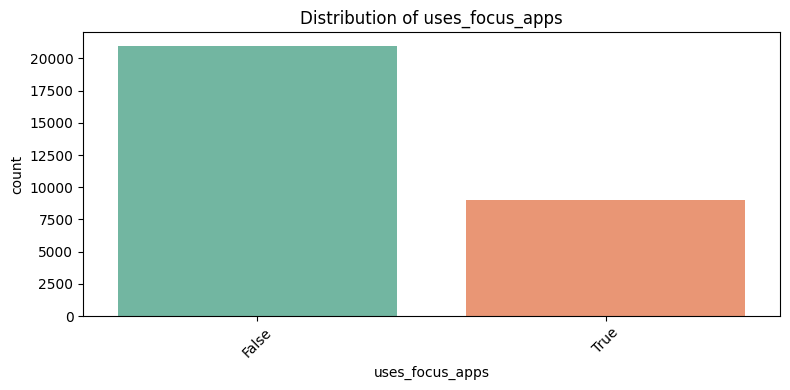

uses_focus_apps
False    20979
True      9021
Name: count, dtype: int64
uses_focus_apps
False    0.699
True     0.301
Name: proportion, dtype: float64

----------------------------------------



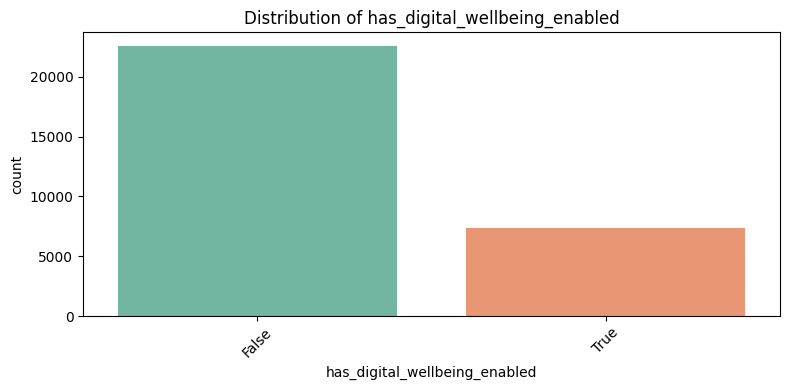

has_digital_wellbeing_enabled
False    22602
True      7398
Name: count, dtype: int64
has_digital_wellbeing_enabled
False    0.753
True     0.247
Name: proportion, dtype: float64

----------------------------------------



In [9]:
qualitative_vars = [
    'gender', 'job_type', 'social_platform_preference',
    'uses_focus_apps', 'has_digital_wellbeing_enabled'
]

for col in qualitative_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=social_df, x=col, order=social_df[col].value_counts().index, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Frequency table
    print(social_df[col].value_counts())
    print(social_df[col].value_counts(normalize=True).round(3))
    print("\n" + "-"*40 + "\n")


# **Conclusion**

- **Gender**: The sample is well balanced in terms of gender, with 48.2% identifying as male and 47.9% as female. A small minority (3.9%) identify as other genders, indicating inclusivity in data representation.

- **Job Type:** The distribution across job types is relatively even, with Education (16.8%), IT (16.8%), and Finance (16.7%) being the most common sectors. Students and unemployed individuals also form a significant portion, suggesting the dataset captures diverse employment statuses.

- **Social Platform Preference:** TikTok (20.3%) is the most preferred platform, followed closely by Telegram (20.0%), Instagram (20.0%), Twitter (19.9%), and Facebook (19.7%). The distribution reflects current trends in social media usage across different platforms.

- **Uses Focus Apps:** Only 30.1% of users reported using digital focus apps, while 69.9% do not. This may imply a potential area for improvement in digital well-being and productivity enhancement.

- **Digital Wellbeing Enabled:** A larger portion of users (75.3%) do not have Digital Wellbeing features enabled on their devices. This finding may indicate a gap between digital behavior awareness and actionable habits for managing screen time or stress.

# **Univariate Analysis (Quantitative)**

                                  count       mean        std        min  \
age                             30000.0  41.486867  13.835221  18.000000   
daily_social_media_time         30000.0   3.105353   1.977046   0.000000   
number_of_notifications         30000.0  59.958767   7.723772  30.000000   
work_hours_per_day              30000.0   6.990792   1.997736   0.000000   
perceived_productivity_score    30000.0   5.510488   1.968285   2.000252   
actual_productivity_score       30000.0   4.951805   1.807615   0.296812   
stress_level                    30000.0   5.514059   2.773891   1.000000   
sleep_hours                     30000.0   6.500247   1.399175   3.000000   
screen_time_before_sleep        30000.0   1.025568   0.628817   0.000000   
breaks_during_work              30000.0   4.992200   3.173737   0.000000   
coffee_consumption_per_day      30000.0   1.999300   1.410047   0.000000   
days_feeling_burnout_per_month  30000.0  15.557067   9.252956   0.000000   
weekly_offli

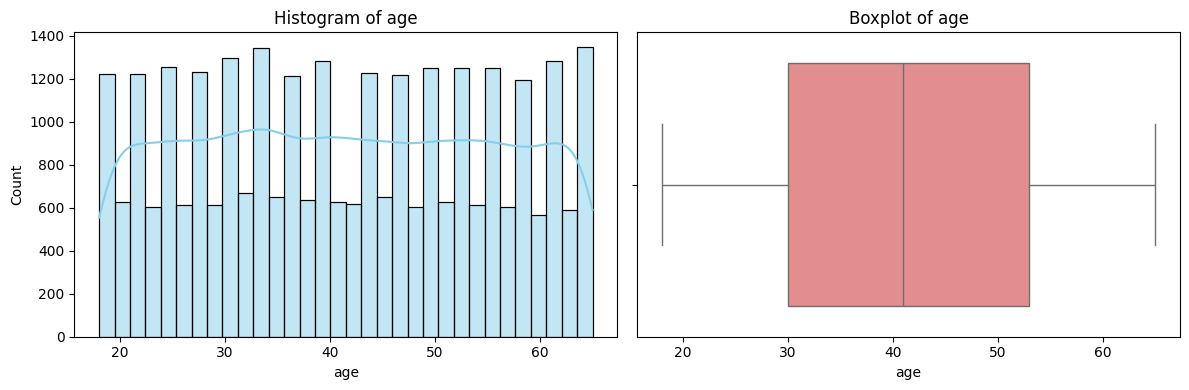

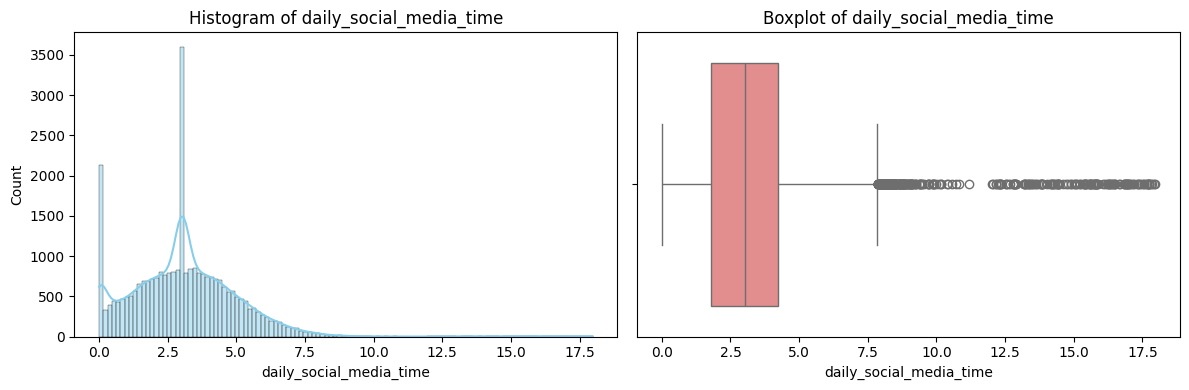

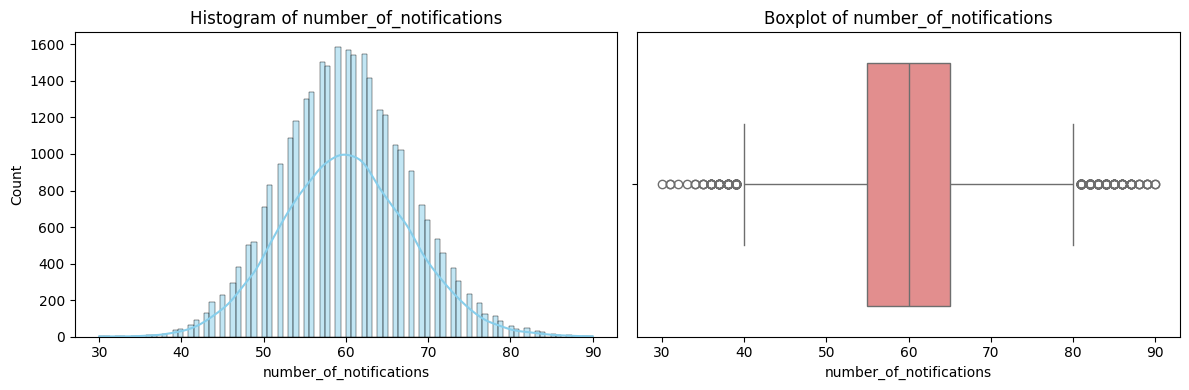

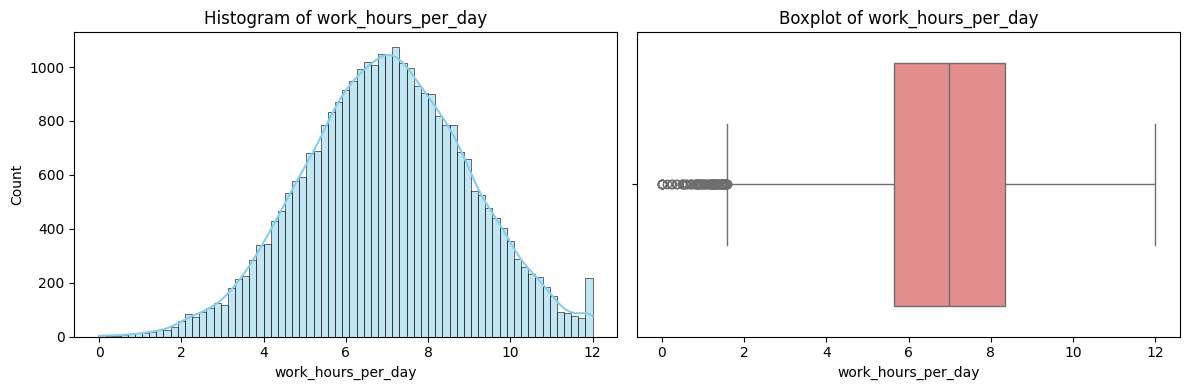

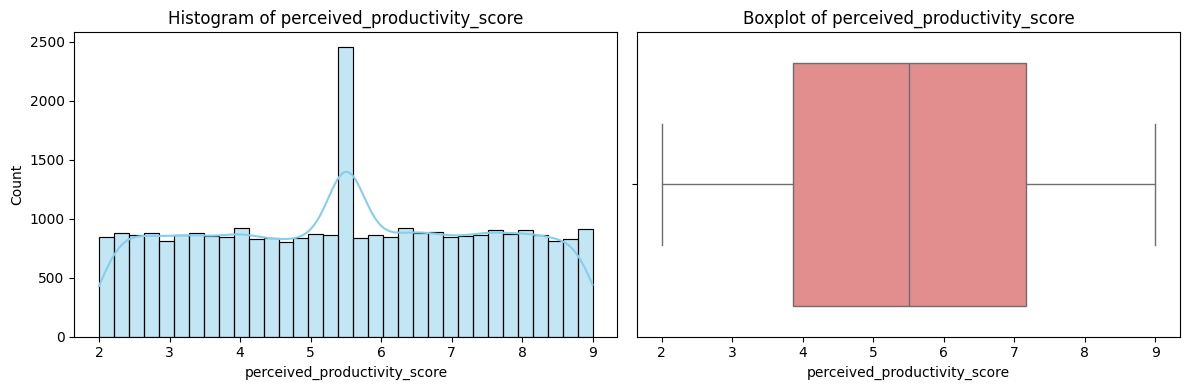

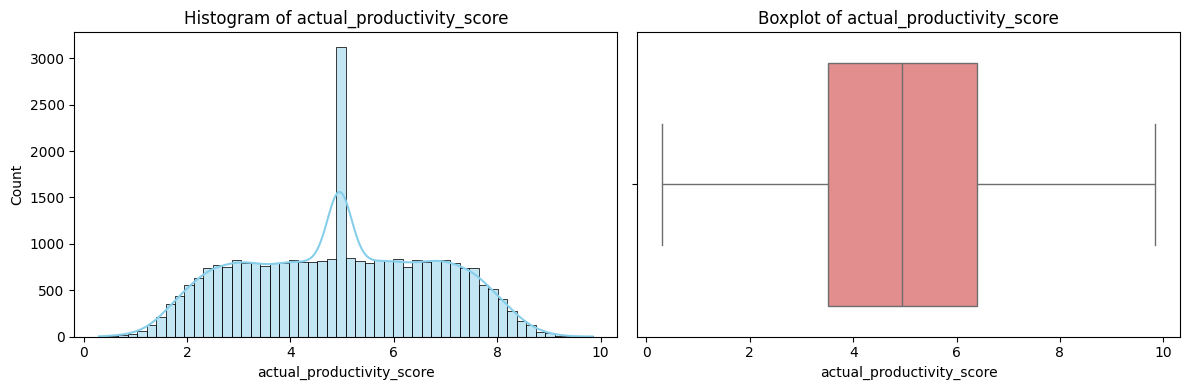

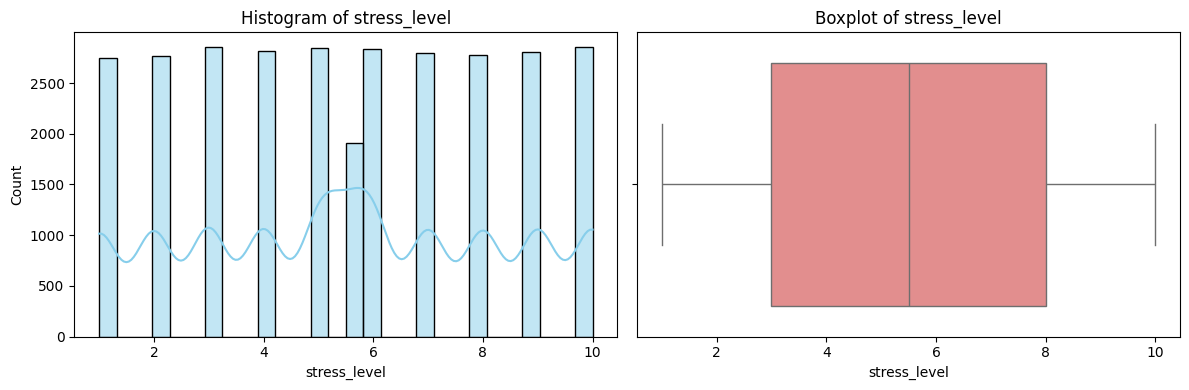

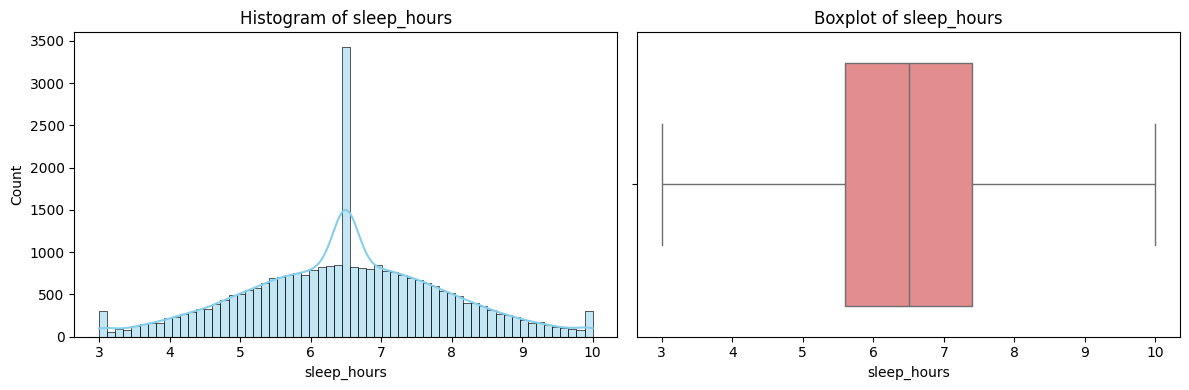

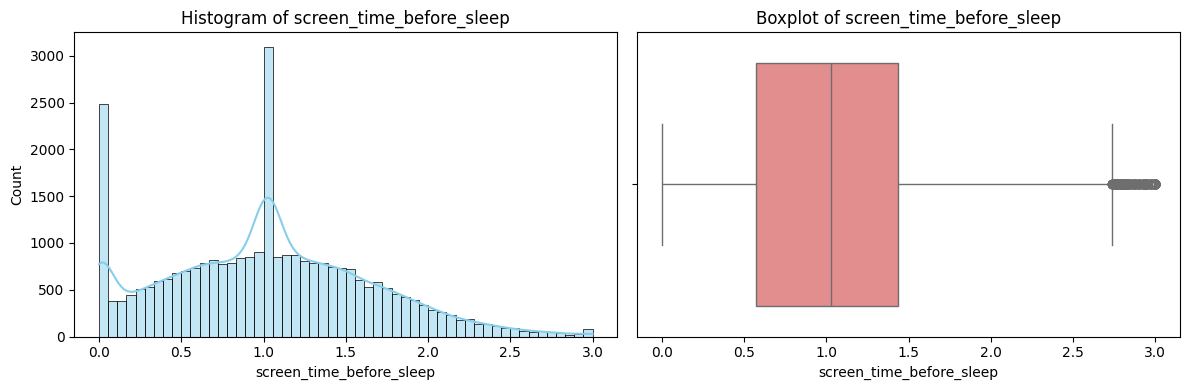

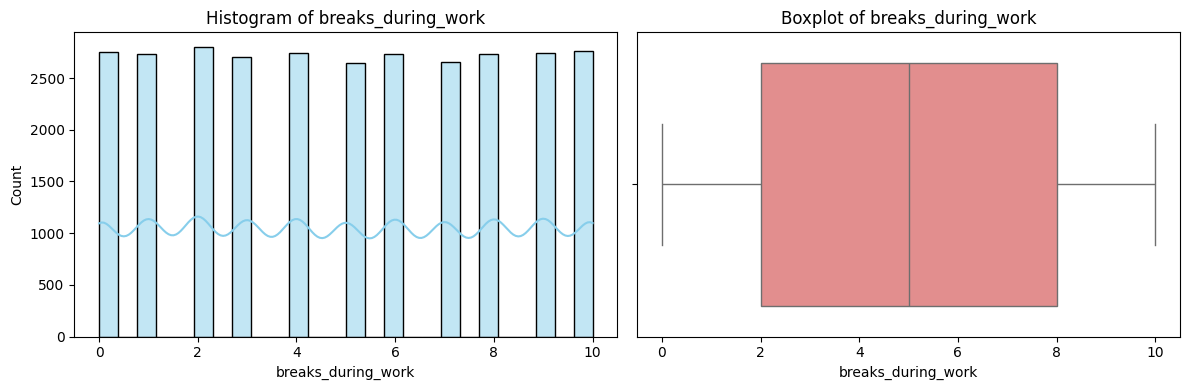

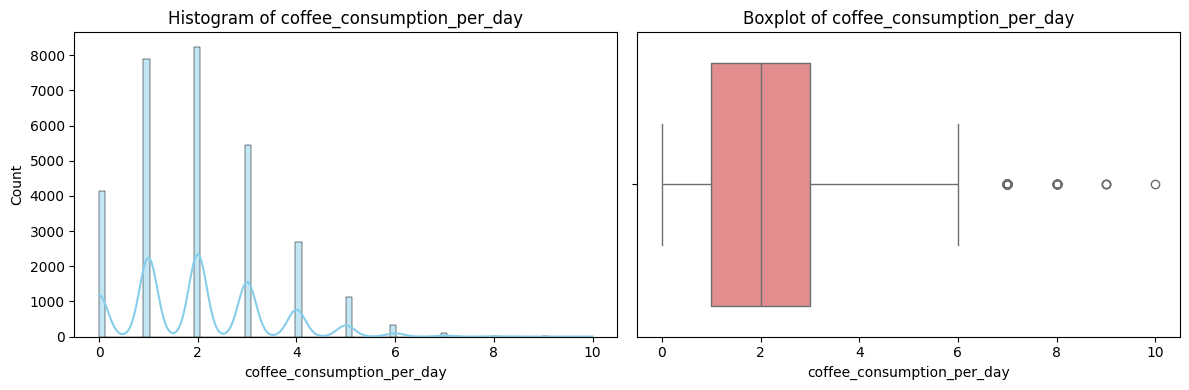

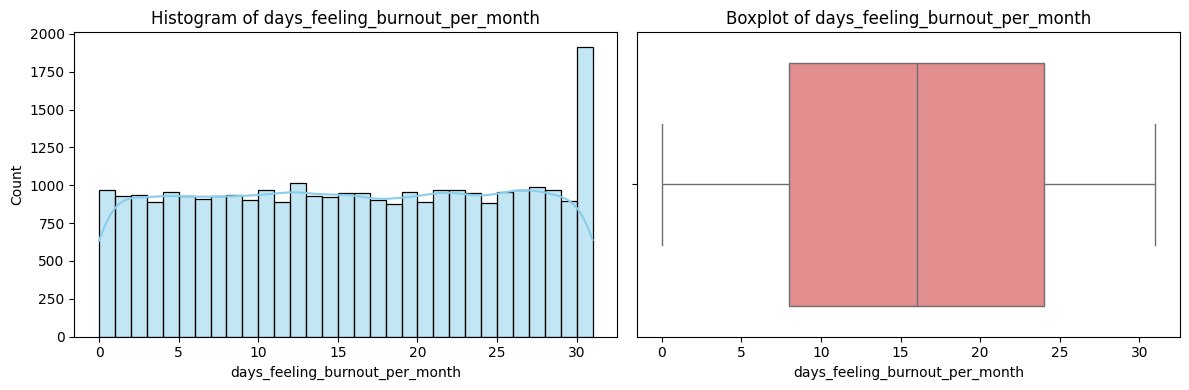

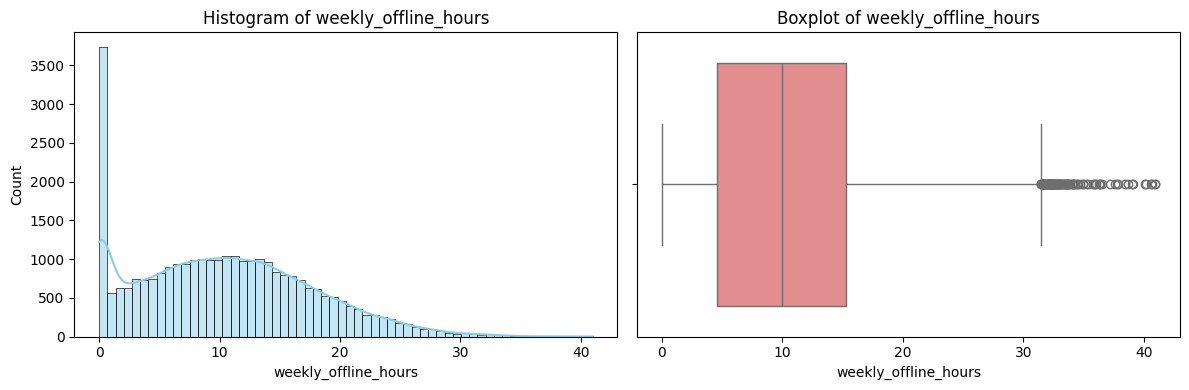

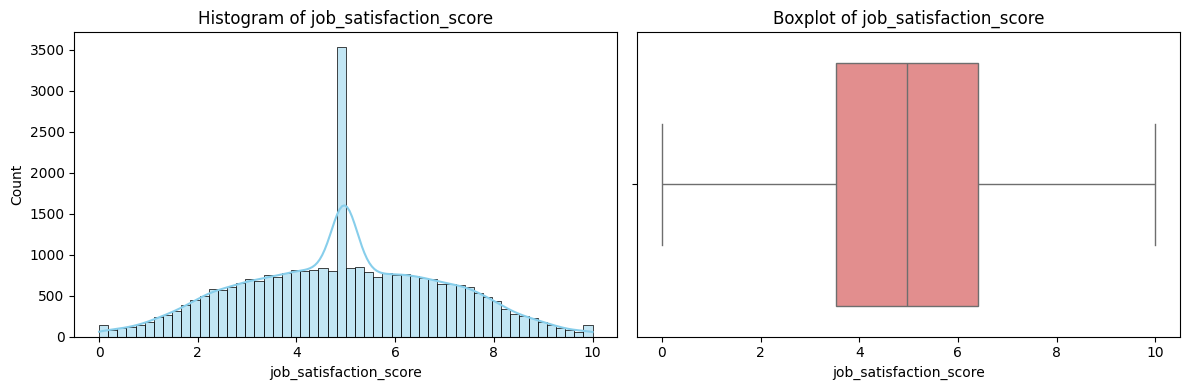

In [10]:
quantitative_vars = [
    'age', 'daily_social_media_time', 'number_of_notifications',
    'work_hours_per_day', 'perceived_productivity_score',
    'actual_productivity_score', 'stress_level', 'sleep_hours',
    'screen_time_before_sleep', 'breaks_during_work',
    'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
    'weekly_offline_hours', 'job_satisfaction_score'
]

# Estatistics
print(social_df[quantitative_vars].describe().T)

# Graphs
for col in quantitative_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(social_df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {col}')

    sns.boxplot(x=social_df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


# **Conclusion**

- **Age:** The users span from 18 to 65 years old, with a mean around 41.5 years. This indicates a fairly mature and diverse sample.

- **Daily Social Media Time:** On average, users spend about 3.1 hours per day on social media, with some extreme cases reaching nearly 18 hours. This suggests potential outliers or heavy usage habits.

- **Number of Notifications:** Users receive around 60 notifications per day on average. The relatively small standard deviation suggests that most users are clustered around this central value.

- **Work Hours per Day:** The average is about 7 hours, with most users reporting between 5.6 and 8.3 hours. This aligns with common work patterns and supports further productivity-related analysis.

- **Perceived vs. Actual Productivity:** Perceived productivity (mean ≈ 5.51) is slightly higher than actual productivity (mean ≈ 4.95), potentially pointing to cognitive bias or self-assessment discrepancies.

- **Stress Level:** The stress score has a wide spread (1 to 10), with an average around 5.5. This shows a mix of low and high-stress users, making this a key variable for segmentation.

- **Sleep Hours:** Most users sleep about 6.5 hours per night. This is slightly below the commonly recommended 7–8 hours, suggesting possible sleep deprivation in the sample.

- **Screen Time Before Sleep:** The average is around 1 hour, with a max of 3 hours, indicating widespread screen exposure at night, a possible factor affecting sleep quality.

- **Breaks During Work:** The median is 5 breaks per day, with wide variation (from 0 to 10). This may reflect differences in work culture or focus habits.

- **Coffee Consumption:** Users drink on average 2 cups of coffee per day, though some consume up to 10. This can be linked to stress and energy management.

- **Burnout Days per Month:** The average is around 15.6 days, which is quite high. Nearly half the month being affected by burnout suggests deeper workplace or lifestyle issues.

- **Weekly Offline Hours:** Users spend an average of 10 hours offline weekly, but this varies widely. Low offline time may be linked to digital fatigue.

- **Job Satisfaction:** The mean satisfaction score is about 4.96, suggesting moderate satisfaction overall, with some room for improvement.

#📊 **Introduction to Bivariate Analysis**

In this section, we conduct a bivariate analysis to explore relationships between pairs of variables related to digital habits, productivity, stress, and overall well-being. By visualizing how these variables interact, we aim to uncover potential patterns and correlations that can inform strategies for improving digital well-being and work-life balance. The following visualizations focus on key variable pairs that are most relevant to our research goals:

- Digital wellbeing features and screen time before sleep

- Use of focus apps and actual productivity

- Stress levels and job satisfaction

- Social media usage and perceived productivity

- Workload and burnout frequency

- Gender differences in stress

- Job type and productivity

Each chart provides visual insights that help us better understand how digital behaviors and work-related factors are interconnected across the sample population.


## **has_digital_wellbeing_enabled × screen_time_before_sleep**

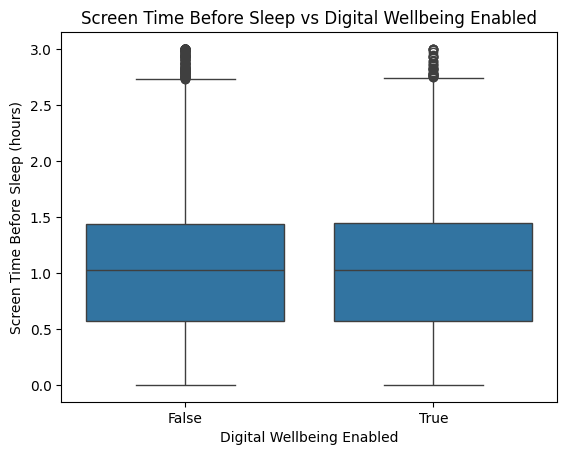

In [11]:
sns.boxplot(x='has_digital_wellbeing_enabled', y='screen_time_before_sleep', data=social_df)
plt.title('Screen Time Before Sleep vs Digital Wellbeing Enabled')
plt.xlabel('Digital Wellbeing Enabled')
plt.ylabel('Screen Time Before Sleep (hours)')
plt.show()

In [12]:
df = social_df[['has_digital_wellbeing_enabled', 'screen_time_before_sleep']].copy()

# Step 2: Data Cleanup
df = df.dropna()  # Remove NaNs
df = df[df['screen_time_before_sleep'] >= 0]  # Remove negative values ​​(if any)

# Step 3: Convert data type if necessary
df['screen_time_before_sleep'] = pd.to_numeric(df['screen_time_before_sleep'], errors='coerce')
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(bool)

# Step 4: Separate the groups
group_true = df[df['has_digital_wellbeing_enabled'] == True]['screen_time_before_sleep']
group_false = df[df['has_digital_wellbeing_enabled'] == False]['screen_time_before_sleep']

# Step 5: (Optional) Reduce sample size for testing if it is too large
group_true_sample = group_true.sample(n=3000, random_state=42)
group_false_sample = group_false.sample(n=3000, random_state=42)

# Step 6: Normality test (Shapiro-Wilk)
shapiro_true = shapiro(group_true_sample)
shapiro_false = shapiro(group_false_sample)

# Step 7: Mann-Whitney Test
mannwhitney = mannwhitneyu(group_true_sample, group_false_sample, alternative='two-sided')

# Results
print("Shapiro-Wilk (Digital Wellbeing Enabled):", shapiro_true)
print("Shapiro-Wilk (Digital Wellbeing Disabled):", shapiro_false)
print("Mann-Whitney U Test:", mannwhitney)

Shapiro-Wilk (Digital Wellbeing Enabled): ShapiroResult(statistic=np.float64(0.9777451796595117), pvalue=np.float64(2.8538259912265173e-21))
Shapiro-Wilk (Digital Wellbeing Disabled): ShapiroResult(statistic=np.float64(0.9779566352825527), pvalue=np.float64(3.605246712123011e-21))
Mann-Whitney U Test: MannwhitneyuResult(statistic=np.float64(4502311.0), pvalue=np.float64(0.972516858979318))


**Conclusion**

Although the distributions of screen time before sleep are not normally distributed for either group, the Mann-Whitney U test indicates no significant difference between individuals who have digital wellbeing features enabled and those who do not (p = 0.972).

This suggests that enabling digital wellbeing features does not significantly influence the amount of screen time before sleep, at least in this dataset.

## **uses_focus_apps × actual_productivity_score**

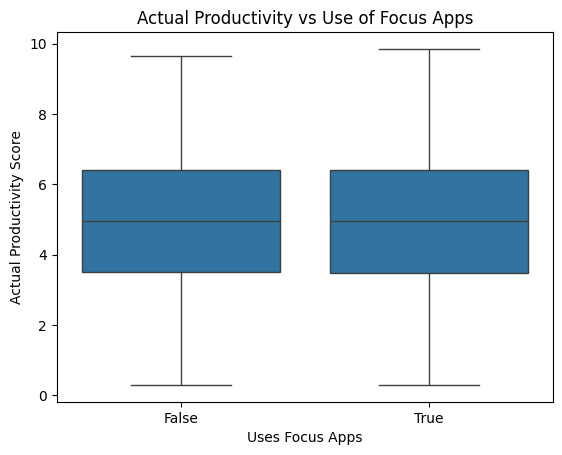

In [13]:
sns.boxplot(x='uses_focus_apps', y='actual_productivity_score', data=social_df)
plt.title('Actual Productivity vs Use of Focus Apps')
plt.xlabel('Uses Focus Apps')
plt.ylabel('Actual Productivity Score')
plt.show()

In [14]:
social_df[['uses_focus_apps', 'actual_productivity_score']].isna().sum()

# Check data types
print(social_df['actual_productivity_score'].dtype)

float64


In [15]:
focus_df = social_df[['uses_focus_apps', 'actual_productivity_score']].dropna()

# Separate groups
group_yes = focus_df[focus_df['uses_focus_apps'] == True]['actual_productivity_score']
group_no = focus_df[focus_df['uses_focus_apps'] == False]['actual_productivity_score']

In [16]:
# Shapiro-Wilk (normality)
shapiro_yes = shapiro(group_yes)
shapiro_no = shapiro(group_no)

# Mann-Whitney (difference between groups)
mann_whitney = mannwhitneyu(group_yes, group_no, alternative='two-sided')

# View results
print("Shapiro Yes:", shapiro_yes)
print("Shapiro No:", shapiro_no)
print("Mann-Whitney:", mann_whitney)

Shapiro Yes: ShapiroResult(statistic=np.float64(0.9810221903637416), pvalue=np.float64(5.604927292409047e-33))
Shapiro No: ShapiroResult(statistic=np.float64(0.9819151797365464), pvalue=np.float64(1.1362545540376542e-44))
Mann-Whitney: MannwhitneyuResult(statistic=np.float64(94527264.0), pvalue=np.float64(0.8860882705712806))


**Conclusion**

Although focus apps are often promoted as productivity boosters, the statistical analysis reveals no significant difference in actual productivity scores between those who use them and those who don't.
This may suggest that other factors—such as work habits, environment, or type of tasks—could play a more important role in determining productivity than the mere use of digital productivity tools.

## **stress_level × job_satisfaction_score**

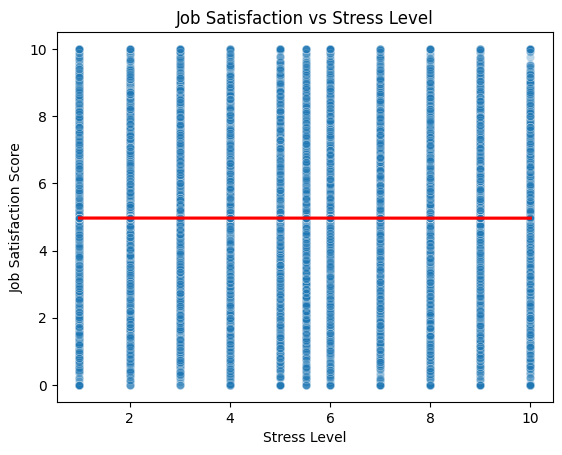

In [17]:
sns.scatterplot(x='stress_level', y='job_satisfaction_score', data=social_df, alpha=0.3)
sns.regplot(x='stress_level', y='job_satisfaction_score', data=social_df, scatter=False, color='red')
plt.title('Job Satisfaction vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Job Satisfaction Score')
plt.show()

In [18]:
pearson = stats.pearsonr(social_df['job_satisfaction_score'], social_df['stress_level'])
spearman = stats.spearmanr(social_df['job_satisfaction_score'], social_df['stress_level'])

print("Pearson:", pearson)
print("Spearman:", spearman)

Pearson: PearsonRResult(statistic=np.float64(-0.0005258695732967818), pvalue=np.float64(0.9274294271238736))
Spearman: SignificanceResult(statistic=np.float64(0.0018507810002774568), pvalue=np.float64(0.748550228576409))


**Conclusion**

The analysis shows no meaningful relationship between stress levels and job satisfaction scores.
Although we might expect that higher stress would reduce job satisfaction, this dataset does not support that assumption statistically. This may indicate that job satisfaction is influenced by other factors beyond stress levels, or that individual perceptions of stress and satisfaction vary widely and independently.

## **daily_social_media_time × perceived_productivity_score**

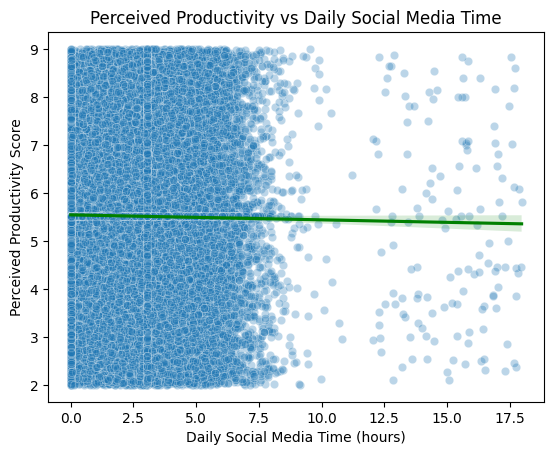

In [19]:
sns.scatterplot(x='daily_social_media_time', y='perceived_productivity_score', data=social_df, alpha=0.3)
sns.regplot(x='daily_social_media_time', y='perceived_productivity_score', data=social_df, scatter=False, color='green')
plt.title('Perceived Productivity vs Daily Social Media Time')
plt.xlabel('Daily Social Media Time (hours)')
plt.ylabel('Perceived Productivity Score')
plt.show()

In [20]:
pearson = stats.pearsonr(social_df['perceived_productivity_score'], social_df['daily_social_media_time'])
spearman = stats.spearmanr(social_df['perceived_productivity_score'], social_df['daily_social_media_time'])

print("Pearson:", pearson)
print("Spearman:", spearman)

Pearson: PearsonRResult(statistic=np.float64(-0.010444963958787298), pvalue=np.float64(0.07043627866497157))
Spearman: SignificanceResult(statistic=np.float64(-0.0080255140740837), pvalue=np.float64(0.1645215057888078))


**Conclusion**

The statistical results indicate no significant relationship between daily social media time and perceived productivity.

Although the correlation coefficients are slightly negative, they are extremely weak and not statistically significant, meaning that higher time spent on social media does not reliably predict lower perceived productivity in this dataset.

This contrasts with some common assumptions, and could suggest the influence of moderating factors (e.g., type of social media use, individual self-regulation, or work context).

## **days_feeling_burnout_per_month × work_hours_per_day**

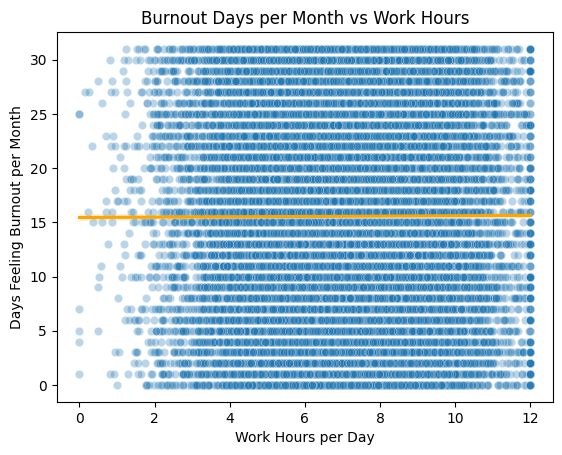

In [21]:
sns.scatterplot(x='work_hours_per_day', y='days_feeling_burnout_per_month', data=social_df, alpha=0.3)
sns.regplot(x='work_hours_per_day', y='days_feeling_burnout_per_month', data=social_df, scatter=False, color='orange')
plt.title('Burnout Days per Month vs Work Hours')
plt.xlabel('Work Hours per Day')
plt.ylabel('Days Feeling Burnout per Month')
plt.show()

In [22]:
# Shapiro for normality
print(stats.shapiro(social_df['days_feeling_burnout_per_month']))
print(stats.shapiro(social_df['work_hours_per_day']))

# Correlation
pearson = stats.pearsonr(social_df['days_feeling_burnout_per_month'], social_df['work_hours_per_day'])
spearman = stats.spearmanr(social_df['days_feeling_burnout_per_month'], social_df['work_hours_per_day'])

print("Pearson:", pearson)
print("Spearman:", spearman)

ShapiroResult(statistic=np.float64(0.9522640566652499), pvalue=np.float64(3.4369526180809657e-69))
ShapiroResult(statistic=np.float64(0.9987028363657273), pvalue=np.float64(1.1129165288113068e-14))
Pearson: PearsonRResult(statistic=np.float64(0.003390910046336548), pvalue=np.float64(0.5570021978862155))
Spearman: SignificanceResult(statistic=np.float64(0.005492460421621121), pvalue=np.float64(0.3414573919099152))


**Conclusion**

The results show no significant correlation between daily work hours and the number of days feeling burnout per month.

Despite expectations that longer workdays might lead to more burnout, the data shows no meaningful linear or monotonic relationship between these two variables in this sample.

This suggests that burnout may be influenced by factors beyond just daily hours worked, such as:

- Work intensity or pressure

- Role type or management style

- Recovery time and work-life balance

## **gender × stress_level**

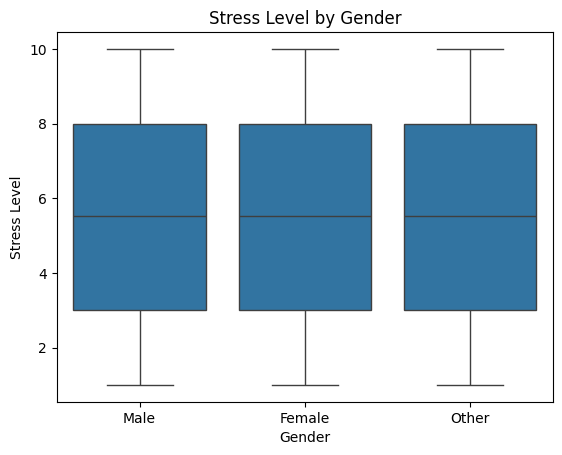

In [23]:
sns.boxplot(x='gender', y='stress_level', data=social_df)
plt.title('Stress Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Level')
plt.show()

In [24]:
# Check normality
male = social_df[social_df['gender'] == 'Male']['stress_level']
female = social_df[social_df['gender'] == 'Female']['stress_level']

print("Shapiro Male:", stats.shapiro(male))
print("Shapiro Female:", stats.shapiro(female))

# If normal:
ttest = stats.ttest_ind(male, female)
print("T-test:", ttest)

# If not normal:
mannwhitney = stats.mannwhitneyu(male, female)
print("Mann-Whitney:", mannwhitney)

Shapiro Male: ShapiroResult(statistic=np.float64(0.9465678736610718), pvalue=np.float64(1.6714823269296806e-57))
Shapiro Female: ShapiroResult(statistic=np.float64(0.9450642847528523), pvalue=np.float64(6.410967564000693e-58))
T-test: TtestResult(statistic=np.float64(0.2989292896045842), pvalue=np.float64(0.7649961538049448), df=np.float64(28820.0))
Mann-Whitney: MannwhitneyuResult(statistic=np.float64(104003245.5), pvalue=np.float64(0.8138155084629994))


**Conclusion**

The statistical tests indicate that there is no significant difference in reported stress levels between male and female respondents in this dataset.

Although previous hypotheses or studies may suggest gender-based differences in stress, this particular data sample does not support that claim with statistical evidence.

Implication:
Stress management strategies may need to be designed without assuming gender-based differences, and instead focus on individual or job-related factors that contribute to stress levels.

## **job_type × actual_productivity_score**

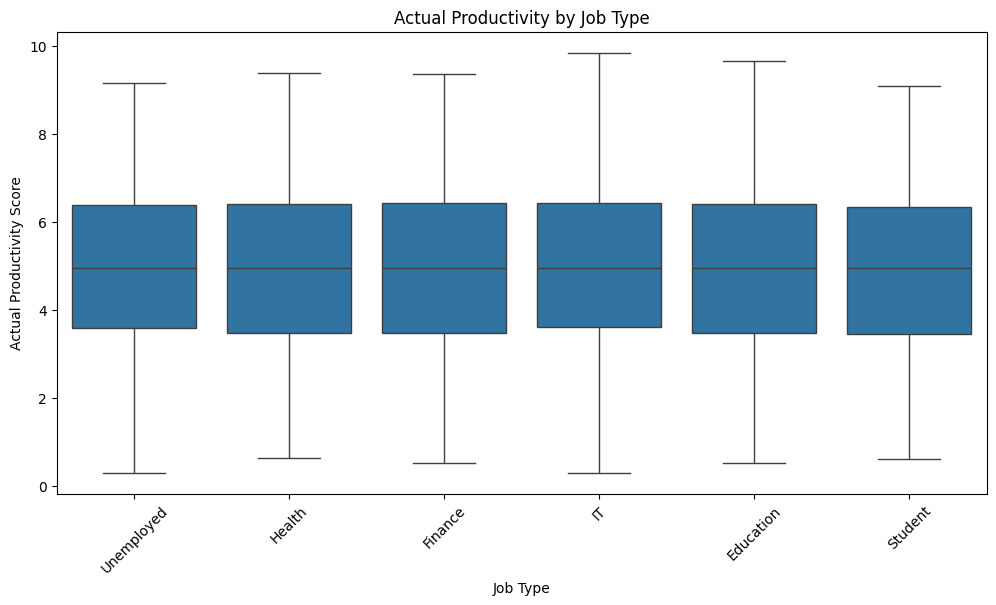

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='job_type', y='actual_productivity_score', data=social_df)
plt.xticks(rotation=45)
plt.title('Actual Productivity by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Actual Productivity Score')
plt.show()

In [26]:
# Check normality by group
for job in social_df['job_type'].unique():
    stat, p = stats.shapiro(social_df[social_df['job_type'] == job]['actual_productivity_score'])
    print(f"{job}: p={p:.3f}")

# If all distributions are normal:
anova = stats.f_oneway(*[social_df[social_df['job_type'] == job]['actual_productivity_score'] for job in social_df['job_type'].unique()])
print("ANOVA:", anova)

# Otherwise, use Kruskal-Wallis:
kruskal = stats.kruskal(*[social_df[social_df['job_type'] == job]['actual_productivity_score'] for job in social_df['job_type'].unique()])
print("Kruskal-Wallis:", kruskal)

Unemployed: p=0.000
Health: p=0.000
Finance: p=0.000
IT: p=0.000
Education: p=0.000
Student: p=0.000
ANOVA: F_onewayResult(statistic=np.float64(2.135782857522188), pvalue=np.float64(0.05816165469294948))
Kruskal-Wallis: KruskalResult(statistic=np.float64(10.862340651727486), pvalue=np.float64(0.05417871900151813))


**Conclusion**

Although visual differences may appear between job types, the statistical tests do not show a significant difference in actual productivity scores across job categories.

Both ANOVA and Kruskal-Wallis tests suggest that the observed variations are likely due to random chance rather than a real effect of job type on productivity.

Implication:
While some job types (e.g., IT or Design) are often perceived as more productive in remote settings, this dataset does not provide strong statistical evidence to support that assumption.

# **Machine Learning**

**Pre - Process**

In [27]:
# Selecting relevant columns
features = [
    'age', 'gender', 'job_type', 'daily_social_media_time', 'social_platform_preference',
    'number_of_notifications', 'work_hours_per_day', 'stress_level', 'sleep_hours',
    'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps',
    'has_digital_wellbeing_enabled', 'coffee_consumption_per_day',
    'days_feeling_burnout_per_month', 'weekly_offline_hours', 'job_satisfaction_score'
]

target = 'actual_productivity_score'

# Filter columns for new DataFrame
df_model = social_df[features + [target]].copy()

# Separate X and y
X = df_model.drop(columns=[target])
y = df_model[target]

**Creating Pipeline**

In [28]:

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Identify column types
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Transformer combination
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Final pipeline with RandomForest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

**Train and evaluate the model**

In [29]:
# Division into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Training
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Assessment
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 1.07
MAE: 0.83
R²: 0.65


📌 1. MAE – Mean Absolute Error (0.83)

This means that, on average, the model’s predictions deviate by 0.83 points from the actual productivity score (on a 0–10 scale).
For example, if someone's actual productivity is 7.0, the model typically predicts between 6.2 and 7.8.

🔎 Interpretation: An average error of less than 1 point is quite reasonable for behavioral data, which often includes noise and subjectivity.
📌 2. RMSE – Root Mean Squared Error (1.07)

RMSE penalizes larger errors more than MAE, as it squares the errors before averaging them.
Since RMSE is relatively close to MAE (1.07 vs 0.83), this suggests that there are few extreme outliers affecting the model’s predictions.

🔎 Interpretation: Errors are fairly evenly distributed, and the model is not heavily skewed by a small number of poor predictions.
📌 3. R² – Coefficient of Determination (0.65)

R² indicates how much of the variance in the actual productivity score is explained by the model.
A value of 0.65 means the model explains 65% of the variability in actual productivity based on the input features.

🔎 Interpretation: This is a solid performance for a behavioral dataset, especially considering that productivity is influenced by multiple subjective and external factors.
🧠 Final Thoughts

The regression model shows moderately strong performance:

- Good prediction accuracy (low MAE and RMSE),

- Significant explanatory power (R² = 0.65),

- Room for improvement through feature engineering, hyperparameter tuning, or trying more advanced models.

**Regression**

🎯 Target: actual_productivity_score

🧠 Justification: This is the ground truth of productivity, ideal for predicting based on digital habits, lifestyle and work.

In [30]:
# Separate X and y
X = social_df.drop(columns='actual_productivity_score')
y_reg = social_df['actual_productivity_score']  # Para regressão

# For classification
y_clf = pd.cut(
    y_reg,
    bins=[-float('inf'), 0.4, 0.7, float('inf')],
    labels=['Low', 'Medium', 'High']
)

In [31]:
# To divide
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Identify columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline
reg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# To train
reg_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = reg_pipeline.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 0.5021008357992714
R²: 0.8450438035338207


✅ **Step 1: Regression — Predicting actual_productivity_score**

1. **Separate X and y**

In [32]:
# y = continuous target
y = social_df['actual_productivity_score']

# X = all other variables
X = social_df.drop(columns='actual_productivity_score')

🧹 **22. Separate numeric and categorical columns**

In [33]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()


✂️ **3. Training and testing**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

🏗️ **4. Create Preprocessing Pipeline + Model**

In [35]:
# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [36]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'daily_social_media_time',
                                                   'number_of_notifications',
                                                   'work_hours_per_day',
                                                   'perceived_productivity_score',
                                                   'stress_level',
                                                   'sleep_hours',
                                                   'screen_time_before_sleep',
                                                   'breaks_during_work',
                                                   'coffee_consumption_per_day',
                                                   'days_feeling_burnout_per_month',
                                                   'weekly_offline_hours',
                                                   'job_satisfaction_score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'job_type',
                                                   'social_platform_preference',
                                                   'uses_focus_apps',
                                                   'has_digital_wellbeing_enabled'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

🚀 **5. Train the model**

In [37]:
reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'daily_social_media_time',
                                                   'number_of_notifications',
                                                   'work_hours_per_day',
                                                   'perceived_productivity_score',
                                                   'stress_level',
                                                   'sleep_hours',
                                                   'screen_time_before_sleep',
                                                   'breaks_during_work',
                                                   'coffee_consumption_per_day',
                                                   'days_feeling_burnout_per_month',
                                                   'weekly_offline_hours',
                                                   'job_satisfaction_score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'job_type',
                                                   'social_platform_preference',
                                                   'uses_focus_apps',
                                                   'has_digital_wellbeing_enabled'])])),
                ('model', RandomForestRegressor(random_state=42))])

📊 **6. Model evaluation**

In [38]:
y_pred = reg_pipeline.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.5088326600338645
Mean Squared Error (MSE): 0.5021008357992714
R² Score: 0.8450438035338207


**Regression Model Performance Conclusion**

The regression model achieved a R² score of 0.85, indicating that it explains approximately 85% of the variance in actual productivity scores.
The Mean Absolute Error (MAE) of 0.51 and Mean Squared Error (MSE) of 0.50 suggest that the model makes relatively small prediction errors on average.
Overall, this model performs well and shows strong potential for predicting employee productivity based on behavioral and lifestyle data.

**Importance of Variables**

In [39]:
# Access the importance of variables
importances = model_pipeline.named_steps['regressor'].feature_importances_

# Get feature names after preprocessing
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for visualization

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show Top 10
feature_importance_df.head(10)

,Feature,Importance
4,num__perceived_productivity_score,0.829113
12,num__job_satisfaction_score,0.056263
6,num__sleep_hours,0.011989
3,num__work_hours_per_day,0.011808
11,num__weekly_offline_hours,0.010868
1,num__daily_social_media_time,0.010527
7,num__screen_time_before_sleep,0.010474
0,num__age,0.009287
2,num__number_of_notifications,0.008808
10,num__days_feeling_burnout_per_month,0.008305


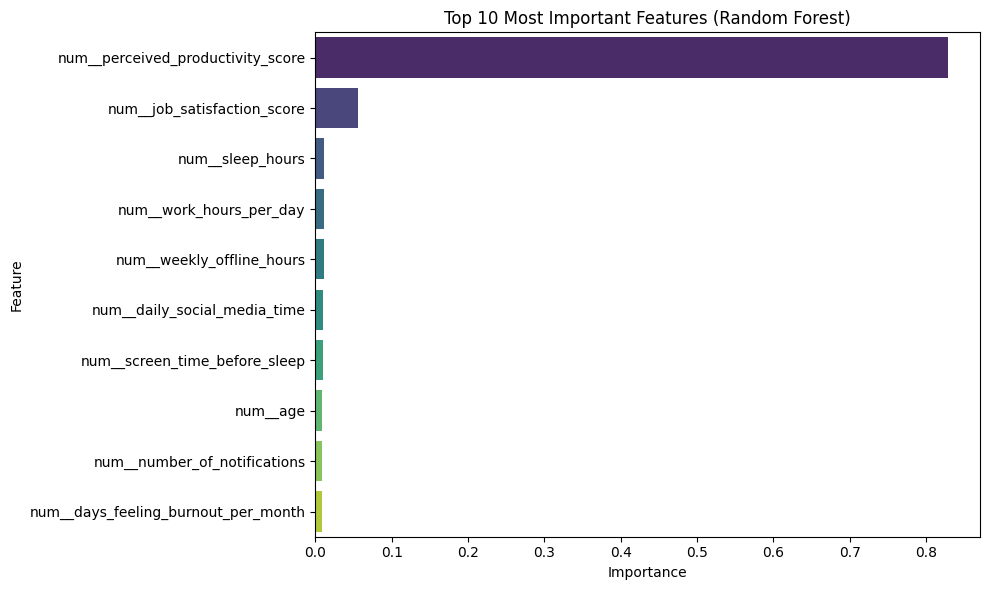

In [40]:
# Extraction of amounts
importances = model_pipeline.named_steps['regressor'].feature_importances_
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Sorted DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

# Graphic
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Conclusion Based on Feature Importance (Regression)**


The Random Forest regression model indicates that the perceived productivity score is by far the most influential predictor of the actual productivity score, with an importance score of 0.83, suggesting a strong alignment between self-perception and measurable productivity.

Other relevant but much less impactful features include:

- Job satisfaction score (0.056)

- Sleep hours, work hours per day, and weekly offline hours, each contributing less than 2% to the model

- Digital behavior metrics such as daily social media time, screen time before sleep, and number of notifications show minor influence

This suggests that while lifestyle and digital habits play a role, subjective perception of productivity and job satisfaction are the strongest indicators of actual productivity in this dataset.

**Classification**

In [41]:
# Divide
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Pipeline
clf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# To train
clf_pipeline.fit(X_train_clf, y_train_clf)

# To evaluate
y_pred_clf = clf_pipeline.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_clf))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00      5997
         Low       0.00      0.00      0.00         1
      Medium       0.00      0.00      0.00         2

    accuracy                           1.00      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       1.00      1.00      1.00      6000



**Step 1 – Create categorical target for classification**

In [42]:
# Create categorical target from actual_productivity_score
social_df['productivity_category'] = pd.qcut(social_df['actual_productivity_score'],
                                      q=3,
                                      labels=['Low', 'Medium', 'High'])

**Step 2 – Update variables for classification**

In [43]:
# y as categories (classification)
y_class = social_df['productivity_category']

# X remains the same (removing the continuous target variable)
X_class = social_df.drop(['actual_productivity_score', 'productivity_category'], axis=1)

In [44]:
# Separate training and testing
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
clf_pipeline.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_clf = clf_pipeline.predict(X_test_clf)

# Evaluation
print("📊 Classification Report:\n")
print(classification_report(y_test_clf, y_pred_clf))

print("🧩 Confusion Matrix:\n")
print(confusion_matrix(y_test_clf, y_pred_clf))

📊 Classification Report:

              precision    recall  f1-score   support

        High       0.85      0.88      0.87      2000
         Low       0.85      0.89      0.87      2000
      Medium       0.75      0.69      0.72      2000

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.82      0.82      0.82      6000

🧩 Confusion Matrix:

[[1758    0  242]
 [   0 1779  221]
 [ 303  309 1388]]


**Classification Performance Summary (3-Class Model)**

The Random Forest classifier achieved an overall accuracy of 82%, showing solid performance in predicting productivity categories.

- The High and Low productivity classes were predicted with high precision and recall (~0.85–0.89), indicating that the model distinguishes well between extreme levels of productivity.

- The Medium class had slightly lower performance (F1-score: 0.72), likely due to overlap with the other classes, which is also visible in the confusion matrix.

- Overall, the model demonstrates strong ability to classify productivity levels, with room for improvement in handling mid-range productivity cases.

**View the Confusion Matrix (Heatmap)**

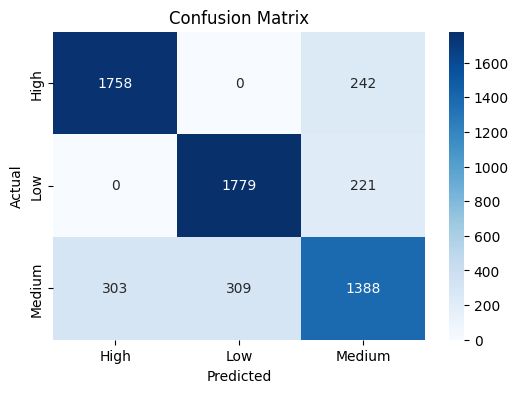

In [45]:
# Confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
labels = sorted(y_class.unique())

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Importance of Variables in the Classifier**

In [46]:
# Access the importance of features
clf_importances = clf_pipeline.named_steps['classifier'].feature_importances_

# Get feature names after preprocessing
feature_names_clf = clf_pipeline.named_steps['preprocessor'].get_feature_names_out()

feature_importance_df = pd.DataFrame({
    'Feature': feature_names_clf,
    'Importance': clf_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

                                Feature  Importance
4     num__perceived_productivity_score    0.393385
12          num__job_satisfaction_score    0.233883
3               num__work_hours_per_day    0.034615
6                      num__sleep_hours    0.033774
11            num__weekly_offline_hours    0.032403
7         num__screen_time_before_sleep    0.032357
1          num__daily_social_media_time    0.031677
0                              num__age    0.028054
2          num__number_of_notifications    0.027983
10  num__days_feeling_burnout_per_month    0.026358


**Feature Importance Interpretation – Classification Model**

The classification model identified perceived productivity score (num__perceived_productivity_score) as the most influential feature by a wide margin, accounting for nearly 40% of the predictive power. This highlights a strong correlation between how productive employees feel and their actual categorized productivity level.

The second most important factor is job satisfaction score (num__job_satisfaction_score), contributing approximately 23%, emphasizing the impact of work satisfaction on performance.

Other relevant features include:

- Work hours per day, sleep hours, and offline hours, all around 3%–4%, reflecting lifestyle balance.

- Screen time before sleep, social media time, and burnout days, each with similar moderate importance, suggesting digital habits and mental well-being are modest but meaningful predictors.

Overall, the results suggest that self-perception, job satisfaction, and digital/lifestyle habits are all key elements in classifying productivity levels, with self-assessed productivity standing out as the top driver.

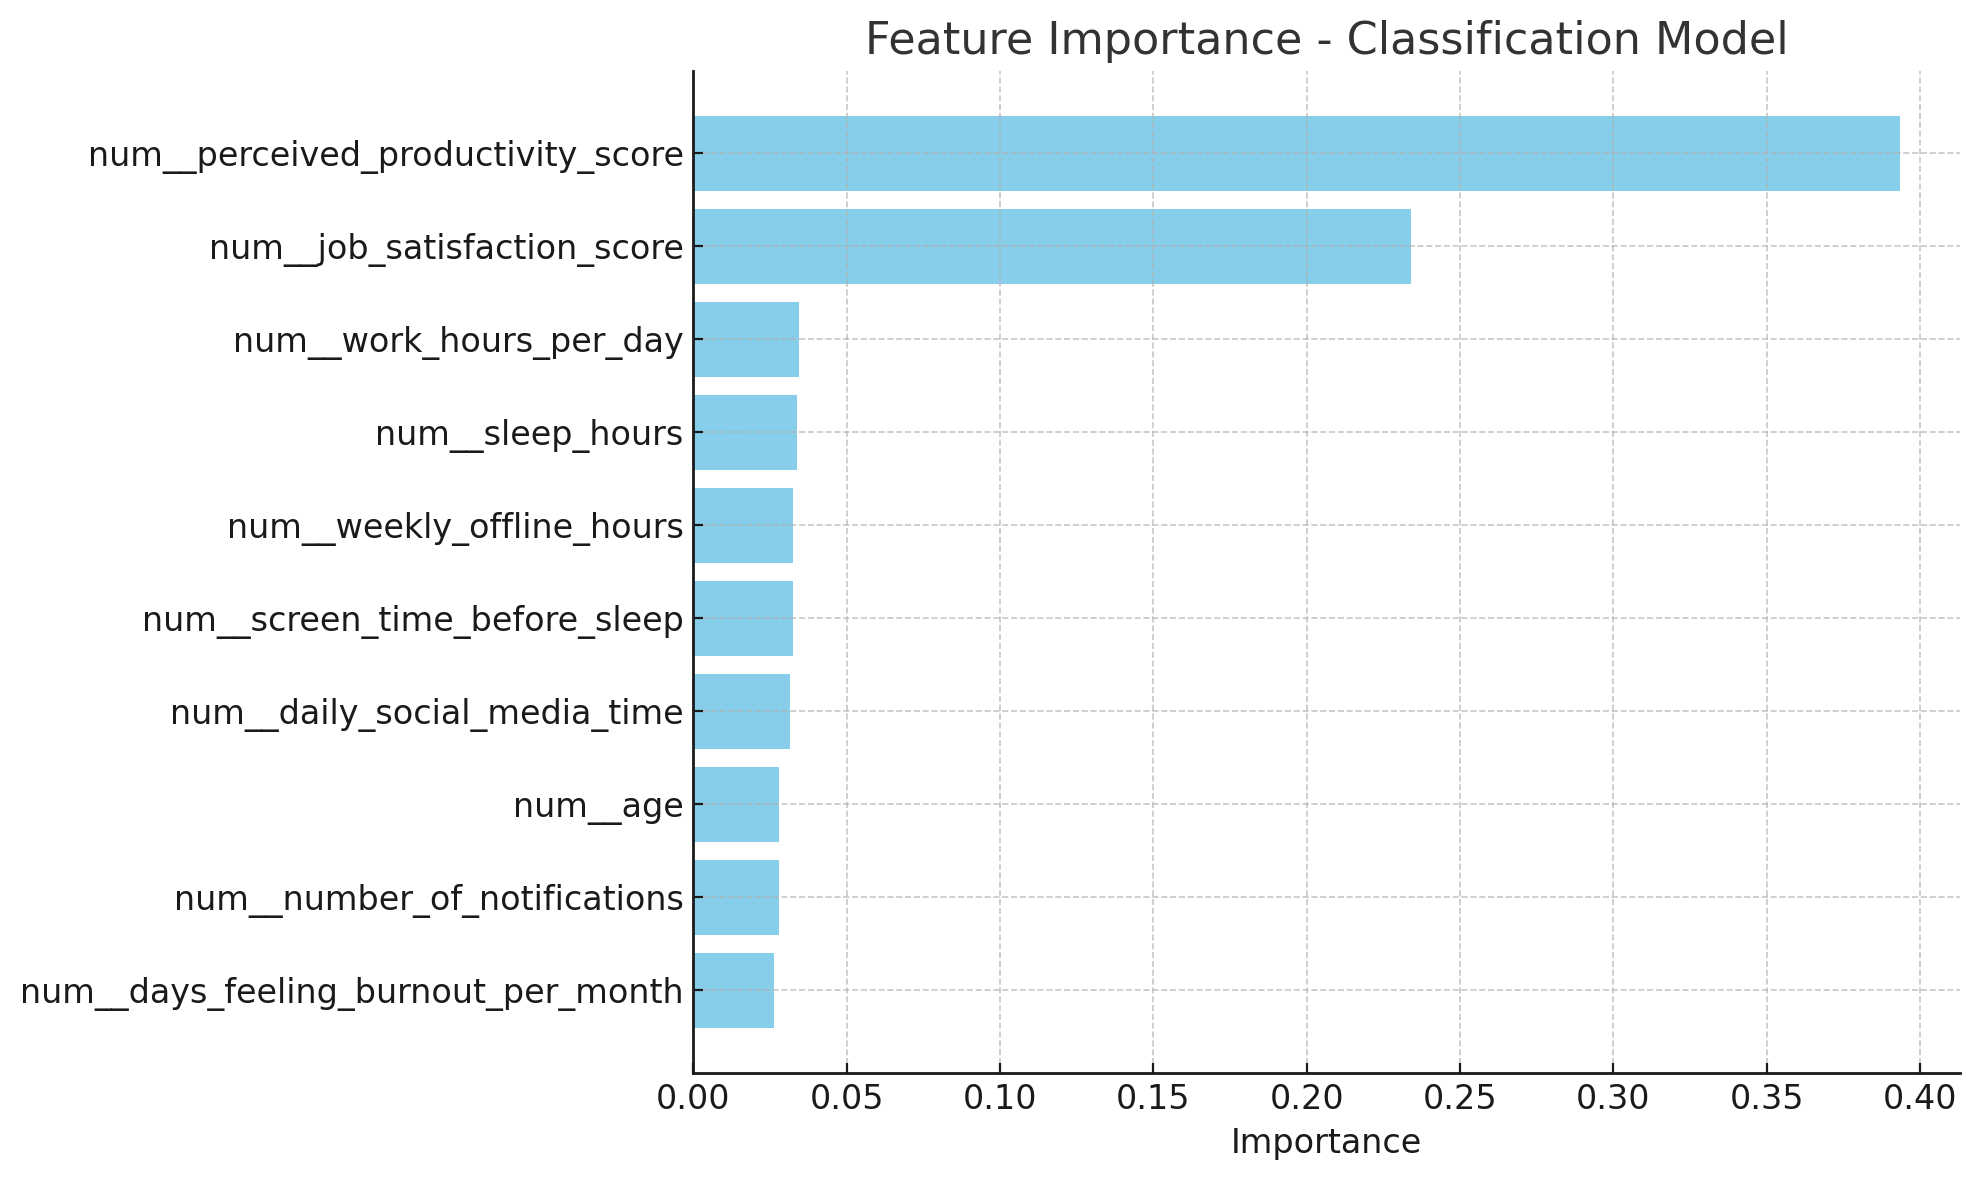

perceived_productivity_score and job_satisfaction_score are by far the most influential factors in predicting actual productivity levels.

There is a group of variables with dynamic and balanced importance related to life and work habits, such as sleep time, screen time, and number of notifications.

The variable days_feeling_burnout_per_month had lower relative importance, but still contributed to the model.



# **Final Conclusion**

This project explored the relationship between digital habits, lifestyle factors, and actual productivity using both regression and classification approaches.

🔹 Regression

We predicted the continuous variable actual_productivity_score using a Random Forest Regressor.
The model performed strongly, achieving an R² score of 0.85, suggesting that the selected features explain a significant portion of the variance in productivity.

The most important predictor was the perceived productivity score, indicating a strong alignment between individuals’ self-assessment and their actual performance. Other variables such as job satisfaction, sleep hours, and screen time before sleep also contributed, though to a lesser extent.

🔹 Classification

We also categorized productivity into three levels (Low, Medium, High) and used a Random Forest Classifier.
The model achieved an overall accuracy of 82%, performing well especially in identifying users in the Low and High categories. The Medium group showed lower performance, possibly due to overlap in behaviors with both extremes.

Feature importance in the classification task mirrored the regression task, again highlighting perceived productivity and job satisfaction as the most influential variables.
📈 Summary

Both models consistently demonstrated that:

- Self-perception (perceived productivity) is a powerful indicator of actual productivity.

- Job satisfaction and certain lifestyle elements (like sleep and offline time) are relevant but secondary.

🚀 Next Steps

To improve model performance and generate deeper insights:

- Apply advanced feature engineering (e.g., feature interactions or ratio features).

- Try additional models (e.g., XGBoost, LightGBM, or interpretable models like Lasso).

- Use SHAP values for explainable AI insights.

- Address class imbalance using SMOTE or weighted classes.

- Segment analysis by demographics or job type for richer patterns.